# Przetwarzanie Grafiki i Muzyki - laboratorium nr 10

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Zadanie 1 (1 punkt)

Napisz funkcję wykonującą przeskalowanie (zmniejszenie / rozszerzenie). Argumentami takiej funkcji powinny być liczby $a$ oraz $b$.

Przeskalowanie można uzyskać za pomocą przekształcenia:

 $$
 \begin{bmatrix} 
 i \\ 
 j  
 \end{bmatrix}= 
 \begin{bmatrix} 
 a & 0 & 0 \\ 
 0 & b & 0  
 \end{bmatrix} 
 \begin{bmatrix} 
 i' \\ 
 j' \\ 
 1 
 \end{bmatrix}, 
 $$

gdzie $a$ odpowiada za rozciągnięcie w poziomie, a $b$ w pionie. Przetestuj kod na obrazie "LENA_512.jpg" dla:
* a = 1, b=2,
* a = 0.5, b=0.5,
* a = 2, b=1.

In [3]:
def scale(image_path, a, b):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    M = np.array([[a, 0, 0],
                  [0, b, 0]], dtype=np.float32)
    scaled_img = cv2.warpAffine(img, M, (int(width * a), int(height * b)))
    cv2.imshow('Original Image', img)
    cv2.imshow('Scaled Image', scaled_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

scale("./img/LENA_512.jpg", 1, 2)
scale("./img/LENA_512.jpg", 0.5, 0.5)
scale("./img/LENA_512.jpg", 2, 1)


## Zadanie 2 (1 punkt)

Napisz funkcję wykonującą obroty obrazu "LENA_512.jpg". Argumentem takiej funkcji powinien być kąt $\phi$. 

Obrót można uzyskać za pomocą przekształcenia:


$$ 
\begin{bmatrix}
i \\ 
j  
\end{bmatrix}
= 
\begin{bmatrix} 
\cos( \phi ) & \sin(\phi) & 0 \\
- \sin(\phi) & cos(\phi) & 0  
\end{bmatrix} 
\begin{bmatrix} 
i' \\ 
j' \\ 
1 
\end{bmatrix}, 
$$

gdzie $\phi$ jest kątem obrotu. 

In [6]:
def rotate(image_path, phi):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    M = cv2.getRotationMatrix2D(center, phi, 1.0)
    rotated_img = cv2.warpAffine(img, M, (width, height))
    
    cv2.imshow('Original Image', img)
    cv2.imshow('Rotated Image', rotated_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

rotate("./img/LENA_512.jpg", 45)
rotate("./img/LENA_512.jpg", -30)


## Zadanie 3 (1 punkt)

Wykonaj pochylenie obrazu "LENA_512.jpg". Argumentem takiej funkcji powinien być kąt $\phi$.

Pochylenie można uzyskać za pomocą przekształcenia:

$$ 
\begin{bmatrix} 
i \\ 
j  
\end{bmatrix}= 
\begin{bmatrix} 
1 & \tan(\phi) & 0 \\ 
0 & 1 & 0  
\end{bmatrix} 
\begin{bmatrix} 
i' \\ 
j' \\ 
1 
\end{bmatrix}, 
$$

gdzie $\phi$ jest kątem pochylenia.

In [7]:
import math

def skew(image_path, phi):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    M = np.float32([[1, math.tan(math.radians(phi)), 0],
                    [0, 1, 0]])

    skewed_img = cv2.warpAffine(img, M, (width, height))

    cv2.imshow('Original Image', img)
    cv2.imshow('Skewed Image', skewed_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

skew("./img/LENA_512.jpg", 30)
skew("./img/LENA_512.jpg", -15)


## Zadanie 4 (1 punkt)

Wykoaj przekształcenie panoramiczne obrazu "LENA_512.jpg".

Przekształcenie panoramiczne można uzyskać za pomocą przekształcenia:

$$
\begin{bmatrix}
i \\ 
j  
\end{bmatrix}= 
\begin{bmatrix} 
a & 0 & 0 \\ 
0 & 1 & 0  
\end{bmatrix} 
\begin{bmatrix} 
i' \\ 
j' \\ 
1 
\end{bmatrix}, 
$$

Panoramiczne przekształcenie poprawia nieprawidłowe proporcje.

In [12]:
def panoramic(image_path, a):
    img = cv2.imread(image_path)
    height, width = img.shape[:2]
    M = np.float32([[a, 0, 0],
                    [0, 1, 0]])
    panoramic_img = cv2.warpAffine(img, M, (int(width * a), height))

    cv2.imshow('Original Image', img)
    cv2.imshow('Panoramic Image', panoramic_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

panoramic("./img/LENA_512.jpg", 0.5)
panoramic("./img/LENA_512.jpg", 2)


## Zadanie 5 (2 punkty)

Znajdź macierz przekształcenia liniowego, które przekształca punkty

  * (37, 116);
  * (37, 256);
  * (454, 1);

na

  * (0, 0);
  * (0, img.rows - 1);
  * (img.cols - 1, 0);
  
a następnie proszę przemnożyć taką macierz przez obrazek:

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/content_car_registration.png)

Proszę wyświetlić przekształcony obrazek.


In [4]:
# cv2.getAffineTransform(...)
# T([37, 116]^T) = A * [37, 116, 1]^T = [0, 0]^T
# T([37, 116]^T) = A * [37, 256]^T = [0, rows - 1]^T
# T([454, 1]^T) = A * [454, 1]^T = [cols - 1, 0]^T

image = cv2.imread('./img/content_car_registration.png')
rows, cols = image.shape[:2]

pts_src = np.float32([[37, 116], [37, 256], [454, 1]])
pts_dst = np.float32([[0, 0], [0, rows - 1], [cols - 1, 0]])
M = cv2.getAffineTransform(pts_src, pts_dst)
transformed_image = cv2.warpAffine(image, M, (cols, rows))

cv2.imshow('Original Image', image)
cv2.imshow('Transformed Image', transformed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Zadanie 6 (2 punkty)

Wyznacz kontury czarnych kropeczek i narysuj je. Użyj obrazu:

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/content_circles.png))

In [3]:
img = cv2.imread("./img/content_circles.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

cv2.imshow("Contours", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


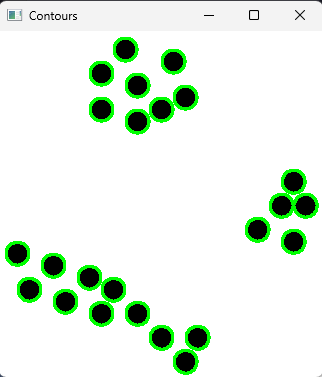

# Zadanie 7 (2 punkty)

Zaznacz rogi i kąty na obrazie:

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/corner.png)

za pomocą metod:
  * Harris Corner Detection
  * FAST Corner Detection

In [16]:
image = cv2.imread("./img/corner.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
dst = cv2.cornerHarris(gray_image, 2, 3, 0.04)
dst = cv2.dilate(dst, None)
harris_corners_colored = image.copy()
harris_corners_colored[dst > 0.01 * dst.max()] = [0, 0, 255]

# FAST Corner Detection
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray_image, None)

fast_corners = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

cv2.imshow('Oryginalny obraz', image)
cv2.imshow('Harris Corner Detection', harris_corners_colored)
cv2.imshow('FAST Corner Detection', fast_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()

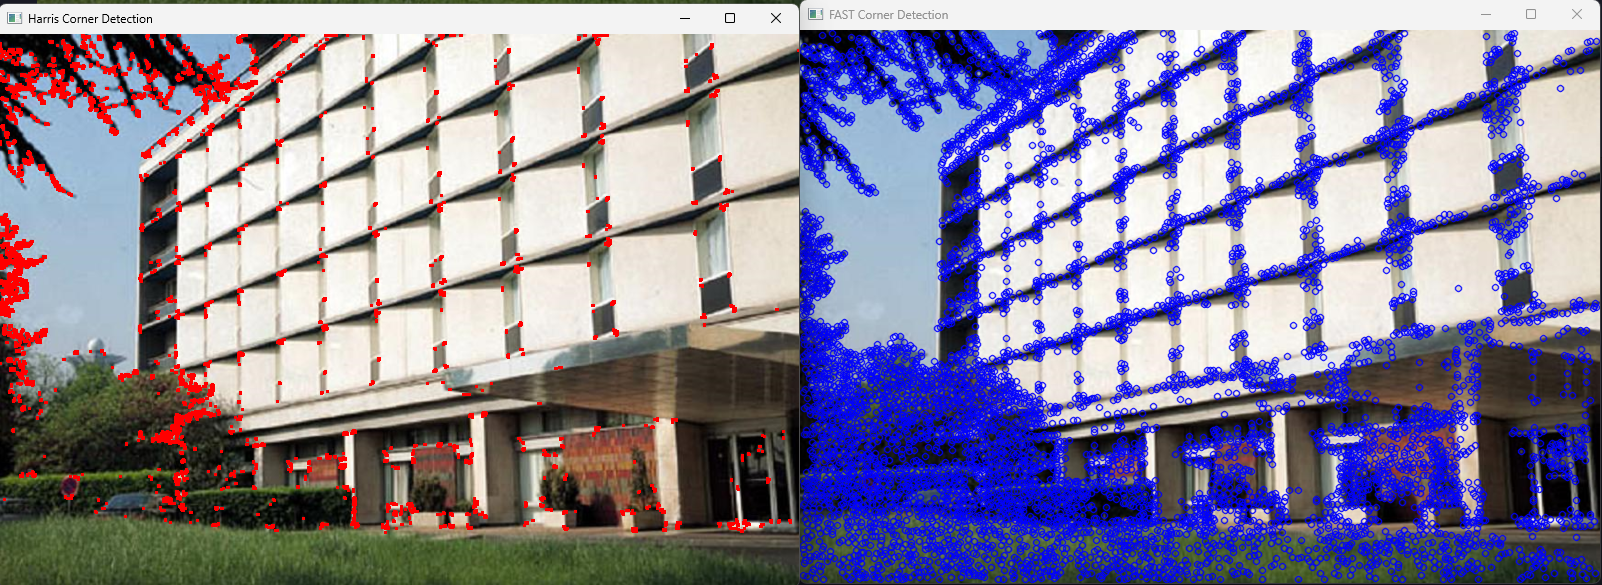